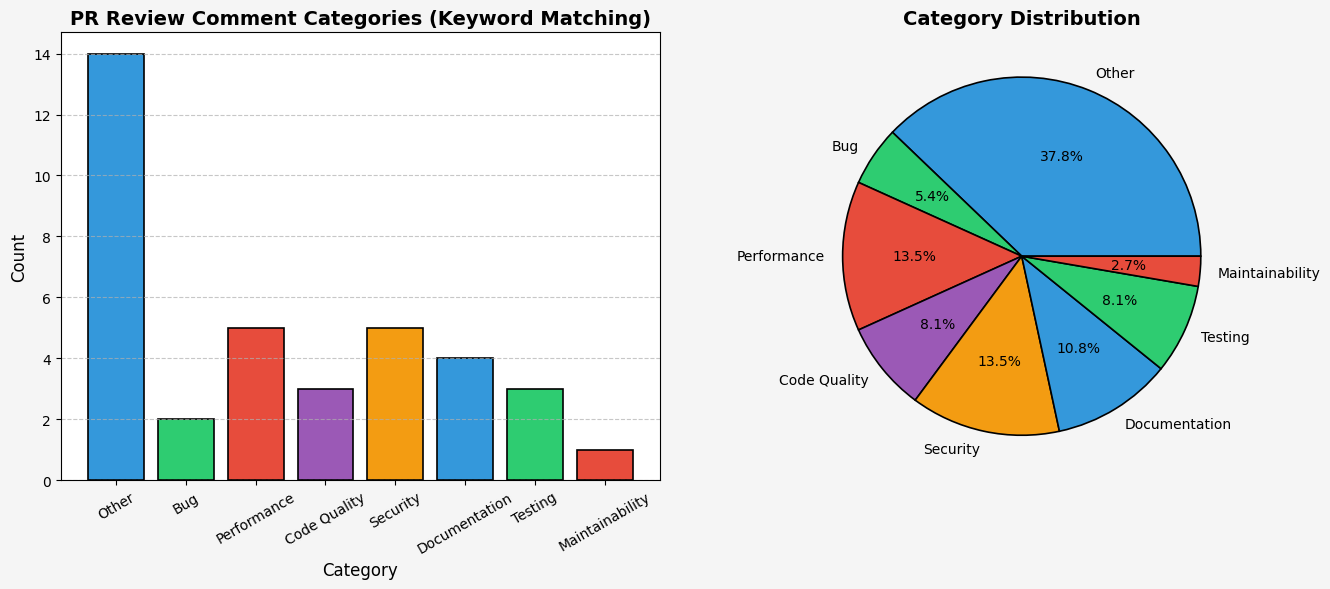

+----+-------------------------------------------------------------------------------+------------------------+-----------------+
|    |                               PR Review Comment                               | Keyword-Based Category | TF-IDF Category |
+----+-------------------------------------------------------------------------------+------------------------+-----------------+
| 0  |              This function is not handling edge cases properly.               |         Other          |       Bug       |
| 1  |                 There is a null pointer exception risk here.                  |          Bug           |       Bug       |
| 2  |             The error handling logic is missing in this function.             |          Bug           |       Bug       |
| 3  |      Boundary conditions should be tested to avoid unexpected failures.       |         Other          |       Bug       |
| 4  |               This logic will fail when the input is negative.                |    

In [ ]:
import re
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
from tabulate import tabulate
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# ============================ 1️⃣ DATA INGESTION ============================= #
def load_comments():
    """Load PR review comments from a given source (manual input)."""
    return [
        "This function is not handling edge cases properly.",
    "There is a null pointer exception risk here.",
    "The error handling logic is missing in this function.",
    "Boundary conditions should be tested to avoid unexpected failures.",
    "This logic will fail when the input is negative.",
    "Consider using a more efficient algorithm here.",
    "The variable names are not meaningful, making the code hard to read.",
    "Try to optimize this loop to improve performance.",
    "Use consistent indentation and formatting for better readability.",
    "This function is too long. Consider breaking it into smaller methods.",
    "Avoid using magic numbers; use constants instead.",
    "There are redundant conditions in this if-else block.",
    "There's a potential security vulnerability in this function.",
    "This input is not properly sanitized, leading to a possible injection attack.",
    "Consider encrypting sensitive data before storing it.",
    "Use HTTPS instead of HTTP for secure communication.",
    "Ensure authentication checks are in place before performing this action.",
    "Please update the documentation for this method.",
    "Add a docstring to describe the purpose of this function.",
    "The parameter descriptions are missing in the method docstring.",
    "This comment is outdated and does not match the current implementation.",
    "Consider adding inline comments to explain complex logic.",
    "Try to optimize this loop to improve performance.",
    "This query can be optimized by adding an index.",
    "Avoid recalculating the same value inside a loop.",
    "Consider using vectorized operations instead of iterating over elements.",
    "This recursive function may cause a stack overflow for large inputs.",
    "There are no unit tests for this function. Please add them.",
    "This test case does not cover edge scenarios.",
    "Consider using mock data instead of real data in test cases.",
    "The assertions in this test are too weak. Make them more specific.",
    "Ensure proper teardown methods to clean up resources after tests.",
    "This code is difficult to maintain. Consider refactoring it.",
    "Avoid deep nesting, as it reduces code readability.",
    "Separate business logic from UI logic for better separation of concerns.",
    "Use dependency injection instead of hardcoded dependencies.",
    "Avoid committing commented-out code; remove unused code instead.",
    ]

# ============================ 2️⃣ CATEGORIZATION ============================= #
categories = {
    "Bug": ["error", "bug", "issue", "edge case", "fix", "exception", "crash", "failure"],
    "Code Quality": ["readability", "refactor", "naming", "clean code", "indentation", "redundant", "duplicate"],
    "Security": ["vulnerability", "secure", "risk", "attack", "encryption", "injection", "authentication", "XSS"],
    "Documentation": ["comment", "docs", "documentation", "explanation", "docstring", "inline comment", "param"],
    "Performance": ["optimize", "slow", "efficient", "performance", "speed", "query", "vectorized", "cache"],
    "Testing": ["unit test", "mock", "assertion", "test case", "coverage", "edge scenarios", "teardown"],
    "Maintainability": ["maintainability", "refactor", "nesting", "dependency injection", "hardcoded", "separation"],
}

def categorize_comment_keyword(comment):
    """Categorize PR comment using keyword-based matching."""
    for category, keywords in categories.items():
        if any(re.search(rf"\b{word}\b", comment, re.IGNORECASE) for word in keywords):
            return category
    return "Other"

def categorize_with_tfidf(comment):
    """Categorize PR comment using TF-IDF similarity."""
    texts = list(categories.keys()) + [comment]
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(texts)
    similarity_scores = cosine_similarity(tfidf_matrix[-1], tfidf_matrix[:-1])
    best_match_index = similarity_scores.argmax()
    return list(categories.keys())[best_match_index]

# ============================ 3️⃣ PROCESSING PIPELINE ============================= #
def process_comments(comments):
    """Process and categorize PR review comments."""
    categorized_data = []

    for comment in comments:
        keyword_category = categorize_comment_keyword(comment)
        tfidf_category = categorize_with_tfidf(comment)
        categorized_data.append((comment, keyword_category, tfidf_category))

    return categorized_data

# ============================ 4️⃣ VISUALIZATION ============================= #
def visualize_results(data):
    """Generate charts for category distribution."""
    df = pd.DataFrame(data, columns=["PR Review Comment", "Keyword-Based Category", "TF-IDF Category"])
    category_counts = Counter(df["Keyword-Based Category"])

    fig, axs = plt.subplots(1, 2, figsize=(14, 6), facecolor='#f5f5f5')

    # Bar chart
    axs[0].bar(category_counts.keys(), category_counts.values(),
                color=['#3498db', '#2ecc71', '#e74c3c', '#9b59b6', '#f39c12'],
                edgecolor='black', linewidth=1.2)
    axs[0].set_title("PR Review Comment Categories (Keyword Matching)", fontsize=14, fontweight='bold')
    axs[0].set_ylabel("Count", fontsize=12)
    axs[0].set_xlabel("Category", fontsize=12)
    axs[0].tick_params(axis='x', rotation=30)
    axs[0].grid(axis='y', linestyle='--', alpha=0.7)

    # Pie chart
    axs[1].pie(category_counts.values(), labels=category_counts.keys(), autopct='%1.1f%%',
               colors=['#3498db', '#2ecc71', '#e74c3c', '#9b59b6', '#f39c12'],
               wedgeprops={'edgecolor': 'black', 'linewidth': 1.2}, textprops={'fontsize': 10})
    axs[1].set_title("Category Distribution", fontsize=14, fontweight='bold')

    plt.tight_layout()
    plt.show()

# ============================ 5️⃣ EXECUTE PIPELINE ============================= #
if __name__ == "__main__":
    comments = load_comments()  # Step 1: Load Data
    categorized_data = process_comments(comments)  # Step 2: Process
    visualize_results(categorized_data)  # Step 3: Analyze

    # Print tabular output
    df = pd.DataFrame(categorized_data, columns=["PR Review Comment", "Keyword-Based Category", "TF-IDF Category"])
    print(tabulate(df, headers='keys', tablefmt='pretty'))

In [3]:
import re
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
from tabulate import tabulate
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# ============================ 1️⃣ DATA INGESTION ============================= #
def get_user_comments():
    """Prompt the user to enter PR review comments."""
    comments = []
    print("Enter PR review comments (type 'done' when finished):")
    while True:
        comment = input("> ")
        if comment.lower() == 'done':
            break
        comments.append(comment)
    return comments

# ============================ 2️⃣ CATEGORIZATION ============================= #
categories = {
    "Bug": ["error", "bug", "issue", "edge case", "fix", "exception", "crash", "failure"],
    "Code Quality": ["remove", "readability", "refactor", "naming", "clean code", "indentation", "redundant", "duplicate", "space"],
    "Security": ["vulnerability", "secure", "risk", "attack", "encryption", "injection", "authentication", "XSS"],
    "Documentation": ["comment", "docs", "documentation", "explanation", "docstring", "inline comment", "param"],
    "Performance": ["optimize", "slow", "efficient", "performance", "speed", "query", "vectorized", "cache"],
    "Testing": ["unit test", "mock", "assertion", "test case", "coverage", "edge scenarios", "teardown"],
    "Maintainability": ["maintainability", "refactor", "nesting", "dependency injection", "hardcoded", "separation"],
}

def categorize_comment_keyword(comment):
    """Categorize PR comment using keyword-based matching."""
    for category, keywords in categories.items():
        if any(re.search(rf"\b{word}\b", comment, re.IGNORECASE) for word in keywords):
            return category
    return "Other"

def categorize_with_tfidf(comment):
    """Categorize PR comment using TF-IDF similarity."""
    texts = list(categories.keys()) + [comment]
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(texts)
    similarity_scores = cosine_similarity(tfidf_matrix[-1], tfidf_matrix[:-1])
    best_match_index = similarity_scores.argmax()
    return list(categories.keys())[best_match_index]

# ============================ 3️⃣ PROCESSING PIPELINE ============================= #
def process_comments(comments):
    """Process and categorize PR review comments."""
    categorized_data = []
    for comment in comments:
        keyword_category = categorize_comment_keyword(comment)
        tfidf_category = categorize_with_tfidf(comment)
        categorized_data.append((comment, keyword_category, tfidf_category))
    return categorized_data

# ============================ 4️⃣ EXECUTE PIPELINE ============================= #
if __name__ == "__main__":
    comments = get_user_comments()  # Step 1: Get user input
    categorized_data = process_comments(comments)  # Step 2: Process

    # Print tabular output
    df = pd.DataFrame(categorized_data, columns=["PR Review Comment", "Keyword-Based Category", "TF-IDF Category"])
    print("\nCategorized PR Review Comments:")
    print(tabulate(df, headers='keys', tablefmt='pretty'))


Enter PR review comments (type 'done' when finished):
> Remove space
> remove logs
> done

Categorized PR Review Comments:
+---+-------------------+------------------------+-----------------+
|   | PR Review Comment | Keyword-Based Category | TF-IDF Category |
+---+-------------------+------------------------+-----------------+
| 0 |   Remove space    |      Code Quality      |       Bug       |
| 1 |    remove logs    |      Code Quality      |       Bug       |
+---+-------------------+------------------------+-----------------+
